Hello all! This notebook is for those interested in using Python to calculate the total return for equity securities such as exchange traded funds (ETFs). Data is extracted from Yahoo Finance using the yfinance package and other packages such as pandas and numpy will be used for data manipulation and calculations.

The calculation of price return has been covered extensively online and computing it is straight forward. While there is much less available concerning the calculation of total return. This post will start with an explanation of how to compute price return and finish by describing how to calculate total returns. 

First of all, what is meant by total return? According to Investopedia, total return is defined as:

>Total return, when measuring performance, is the actual rate of return of an investment or a pool of investments over a given evaluation period. Total return includes interest, capital gains, dividends and distributions realized over a given period of time.

>Total return accounts for two categories of return: income including interest paid by fixed-income investments, distributions or dividends and capital appreciation, representing the change in the market price of an asset. 

From: https://www.investopedia.com/terms/t/totalreturn.asp

In other words, along with the capital appreciation included in price returns, total return for equities also includes dividend income. By recording only the capital appreciation upon calculating price returns, one misses out on an important stream of income from stocks that do pay dividends. Therefore, it's vital to calculate total return to get a true understanding of an asset's returns. Failure to do so means underrating assets with dividend returns in favour of assets with high capital appreciation.

First, we need to import all the needed packages:

In [2]:
!pip install yfinance

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


For reference, a brief introduction of the packages that were just imported above:
*   Pandas is a must for any type of data manipulation in Python
*   NumPy adds various math functions to Python including the logarithm function, which is what we'll be mainly using NumPy for in this example
*   yFinance facilitates the extraction of data from Yahoo Finance, which is where the data will be sourced as it is the most widely available free financial data at our disposal
*   matplotlib.pyplot provides a variety of graphing options and we'll use the fivethirtyeight style of Nate Silver fame

After importing the packages, let's grab an asset price series. This example assumes that the security does not have any stock splits. Calculating the return for securities that have stock splits requires an adjusted close price which will be covered in a future notebook.

Let's choose SPY, an ETF tracking the Standard & Poor's 500 (S&P 500), the standard US equity benchmark index. As mentioned previously, we will be using the yfinance package to pull data from Yahoo Finance and we are setting auto_adjust to False as we want the unadjusted data to do our calculations. 

In [3]:
# Extract SPY data from Yahoo Finance from start of 2016 to end of 2019
data = yf.Ticker('SPY').history(start = "2016-01-01", end = "2019-12-31", auto_adjust = False)

Let's take a look at the data series, the head() function shows the first five rows of a pandas dataframe.

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2016-01-04,200.490005,201.029999,198.589996,201.020004,178.051270,222353500,0.0,0
2016-01-05,201.399994,201.899994,200.050003,201.360001,178.352402,110845800,0.0,0
2016-01-06,198.339996,200.059998,197.600006,198.820007,176.102646,152112600,0.0,0
2016-01-07,195.330002,197.440002,193.589996,194.050003,171.877716,213436100,0.0,0
2016-01-08,195.190002,195.850006,191.580002,191.919998,169.991028,209817200,0.0,0


Where are the dividends? Since we are only looking at the head of the table (first five trading days) and as dividends for this ETF are usually paid just before quarter-end, we won't see any dividends in the head. 

We can take a look to check what dividends were paid in 2016, the following code slices the "data" dataframe in two different ways. First, it looks for rows where the dividends are not equal to zero and then it selects rows during the year 2016:

In [5]:
data[data['Dividends'] != 0 ].loc['2016']

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2016-03-18,204.169998,204.779999,203.800003,204.380005,181.961029,138372400,1.050,0
2016-06-17,207.169998,207.199997,205.750000,206.520004,184.822449,117055700,1.078,0
2016-09-16,213.479996,213.690002,212.570007,213.369995,191.917389,155236400,1.082,0
2016-12-16,226.009995,226.080002,224.669998,225.039993,203.607056,156420200,1.329,0


The SPY has had no stock splits as it is tracking an index and therefore, we can use the unadjusted close to compute the simple and log returns. For those unfamiliar with stock splits, see Investopedia's definition:

>A stock split happens when a company increases the number of its shares to boost the stock's liquidity. Although the number of shares outstanding increases by a specific multiple, the total dollar value of all shares outstanding remains the same because a split does not fundamentally change the company's value.

https://www.investopedia.com/terms/s/stocksplit.asp

# Getting Started with Simple and Log Price Returns

Lets get started with computing simple and log price returns! 

The key difference between the two lies in how they can be aggregated. Simple returns are used for aggregating across assets while log returns are used for aggregating across time. 
* The simple return of a portfolio consisting of multiple assets can be calculated by computing the weighted sum of the simple returns of the assets, where the weights are the portfolio weights. 
* While on the other hand, the log return of an asset over a time period can be computed by summing up the log returns of that asset over that given time period.

These returns are transmutable:

To go from simple to log:

$ r = log(R + 1)$

To go from log to simple:

$ R = e^{r} – 1 $

Where $R$ is simple return and $r$ is log return

Let's start with simple returns.

# Simple Price Return
Simple price return is calculated in the following way:

$ \text{Simple Price Return} = \dfrac{P_{t}}{P_{t-1}} - 1$

Where $P$ is the price of the asset at time $t$ and $P_{t-1}$ is the price at time $t-1$

Here are two ways to calculate simple returns, firstly by using the pct_change() function and secondly the shift() function.

Let's start with the pct_change() function as it is more straightforward to use. Simply call the pct_change() function on the series. 

The dropna() function is used to drop N/A data point that occurs on the first observation in the percentage change series. This is because the pct_change() function seeks to calculate the simple return of the first observation despite there not being an observation before it.

In [6]:
# Simple returns by pct_change(), drop first observation
simp_ret_1 = data['Close'].pct_change().dropna()

simp_ret_1.head()

Date
2016-01-05    0.001691
2016-01-06   -0.012614
2016-01-07   -0.023992
2016-01-08   -0.010977
2016-01-11    0.000990
Name: Close, dtype: float64

Now for the shift() function, which in this case takes the previous value of Close or $P_{t-1}$. Note that this method resembles exactly the equation: 

$ \text{Simple Price Return} = \dfrac{P_{t}}{P_{t-1}} - 1$


In [7]:
# Simple returns by shift(), drop first observation
simp_ret_2 = (data['Close'] / data['Close'].shift(1) -1).dropna()

simp_ret_2.head()

Date
2016-01-05    0.001691
2016-01-06   -0.012614
2016-01-07   -0.023992
2016-01-08   -0.010977
2016-01-11    0.000990
Name: Close, dtype: float64

Let's verify that the two simple returns series are completely identical by using the compare() function, this function takes another series or dataframe as the first argument and shows the values that are different. In this case, the values are idential and invoking the function returns no values.

In [8]:
# Find the difference between the two simple returns series
simp_ret_1.compare(simp_ret_2, align_axis = 0)

Series([], Name: Close, dtype: float64)

# Log Price Return

Log price return is calculated as follows:

$ \text {Log Price Return} = \ln( \dfrac{P_{t}}{P_{t-1}}) = \ln (P_{t}) - \ln (P_{t-1}) $

Due to the quotient rule property of logarithims, log price returns can be computed by subtracting the logarithim of the current period's price by the logarithim of the previous period's price. It can be clearly seen that log  and simple price returns are slightly different by again invoking the compare() function.

In [9]:
log_ret = (np.log(data['Close']) - np.log(data['Close'].shift(1))).dropna()
log_ret.compare(simp_ret_1, align_axis = 0)

Date             
2016-01-05  self     0.001690
            other    0.001691
2016-01-06  self    -0.012694
            other   -0.012614
2016-01-07  self    -0.024284
                       ...   
2019-12-26  other    0.005323
2019-12-27  self    -0.000248
            other   -0.000248
2019-12-30  self    -0.005528
            other   -0.005513
Name: Close, Length: 2000, dtype: float64

Next, let's calculate the cumulative return of both price return series and graph them for comparison. The cumulative return is the total change in a security's price over a given time period. It can be calculated as follows:

$ \text {Cumulative Return} = (\dfrac{P_{t}- P_{1}}{P_{1}})$

Where $P_{t}$ is the price at given time $t$ and  $P_{1}$ is the price at the time of purchase

However, the cumulative return can also be calculated by finding the cumulative product of the daily returns up to desired time $t$. This method allows us to easily graph the cumulative returns.

Using the cumprod() function, one can calculate the cumulative product of the series of daily returns where:

$ \text {Cumulative Return} = (1+R_{1})(1+R_{2})...(1+R_{t-1})(1+R_{t})$ 

Where $R_{t}$ is the return of the security at given time period $t$

In [10]:
# Calculate cumulative product to get the cumulative return series
cumu_log_ret = (1 + log_ret).cumprod()
cumu_simp_ret = (1 + simp_ret_1).cumprod()

Now let's plot the two series using the matplotlib package: 
 
1.   Define the graph as fig1 using the plt.figure() function. 
2.   Define the dimensions of the axes using a list of four arguments: [xmin, ymin, dx, dy] where: 
    *   yxmin: Horizontal coordinate of the lower left corner.
    *   ymin: Vertical coordinate of the lower left corner.
    *   dx: Width of the subplot.
    *   dy: Height of the subplot.
3. Plot the simple and logarithmic cumulative returns and give them a label
4. Give the X and Y axis titles
5. Name your graph
6. Enable the legend
7. Show your finished plot!

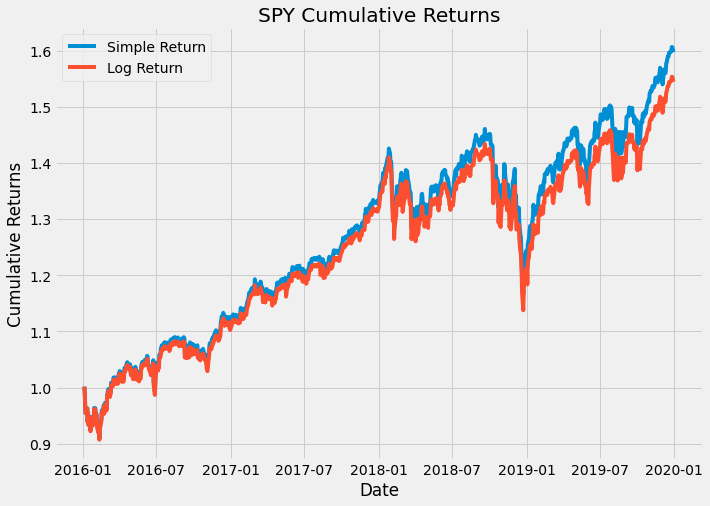

In [11]:
# Plot two series on same graph
fig1 = plt.figure()
ax1 = fig1.add_axes([0.1,0.1,1.5,1.5])
ax1.plot(cumu_simp_ret, label = 'Simple Return')
ax1.plot(cumu_log_ret, label = 'Log Return')
ax1.set_xlabel('Date')
ax1.set_ylabel("Cumulative Returns")
ax1.set_title("SPY Cumulative Returns")
ax1.legend()
plt.show()

We can see that simple returns are always greater than the log returns. This relationship is decribed by the PortfolioProbe blog:

>You can remember which is smaller because the smallest possible simple return is -100%, that is minus infinity for the log return.

For more information about the difference between simple and log returns, check out the rest of the post: https://www.portfolioprobe.com/2010/10/04/a-tale-of-two-returns/

# Total Returns

Finally, let's move onto the computation of total returns. As mentioned earlier, dividends are included in total returns, but ignored in price returns. Another point to raise is that total returns can be calculated as log returns or as simple returns, and the key about total returns is that dividends are included.

Here is how total return is computed: 

$ \text{Simple Total Return} = \dfrac{P_{t}+D_{t}} {P_{t-1}} - 1$


$ \text {Log Total Return} = \ln( \dfrac{P_{t} + D_{t}}{P_{t-1}}) = \ln (P_{t} + D_{t}) - \ln (P_{t-1}) $

Where $D_{t}$ are the dividends paid at time $t$

Note that $P_{t} \text { and }  D_{t}$ are kept together in the logarithm function as not every period has dividends and since $ \ln(0) $ is undefined, separating them will cause errors.



# Daily Simple Total Returns

Let's start with simple total returns. It is as easy as adding dividends to the numerator using the shift() method of computing simple returns. Then, we will compare the cumulative simple total returns to the regular cumulative simple returns by graphing the two series using the tricks we learned earlier.

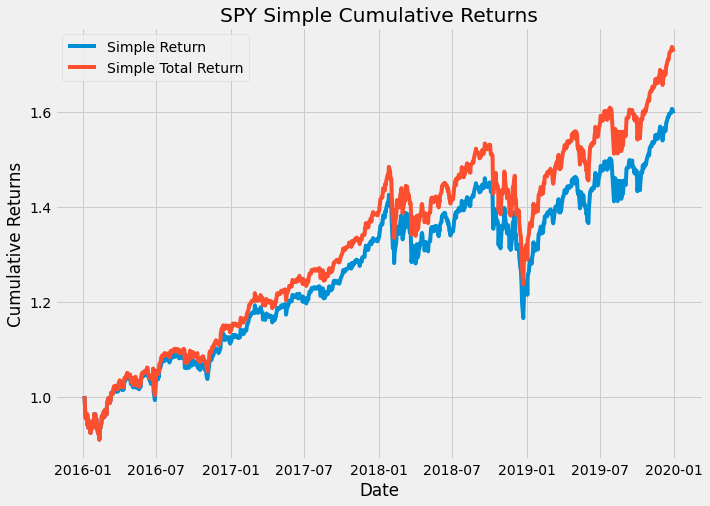

In [12]:
simp_total_ret = ((data['Close'] + data['Dividends'])/data['Close'].shift(1) -1).dropna()

cumu_simp_total_ret = (1 + simp_total_ret).cumprod()

fig3 = plt.figure()
ax3 = fig3.add_axes([0.1,0.1,1.5,1.5])
ax3.plot(cumu_simp_ret, label = 'Simple Return')
ax3.plot(cumu_simp_total_ret, label = 'Simple Total Return')
ax3.set_xlabel('Date')
ax3.set_ylabel("Cumulative Returns")
ax3.set_title("SPY Simple Cumulative Returns")
ax3.legend()
plt.show()

The incorporation of the dividends into the returns has an obvious  effect. The cumulative return is over 10% higher for the total simple return series. The tail() function is the counter to the head function, by default showing the last 5 observations of a dataframe or series. By adding 1 as the argument, the function shows the last observation only.

In [13]:
cumu_simp_total_ret.tail(1) - cumu_simp_ret.tail(1)

Date
2019-12-30    0.129881
dtype: float64


# Daily Log Total Returns

Now, let's move onto log total returns. Their calculation follows a similar process as the log price returns but the dividends are added to the first logarithm function. Like we did with the simple returns, we will also graph the two series.

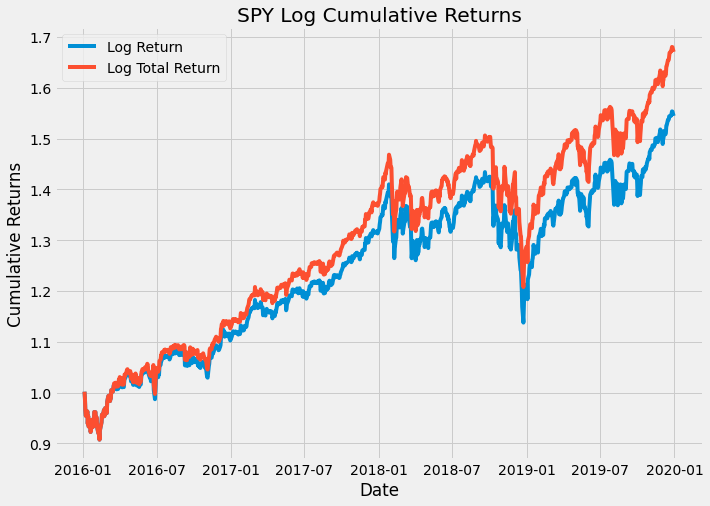

In [14]:
log_total_ret = (np.log(data['Close'] + data['Dividends']) - np.log(data['Close'].shift(1))).dropna()

cumu_log_total_ret = (1 + log_total_ret).cumprod()

fig4 = plt.figure()
ax4 = fig4.add_axes([0.1,0.1,1.5,1.5])
ax4.plot(cumu_log_ret, label = 'Log Return')
ax4.plot(cumu_log_total_ret, label = 'Log Total Return')
ax4.set_xlabel('Date')
ax4.set_ylabel("Cumulative Returns")
ax4.set_title("SPY Log Cumulative Returns")
ax4.legend()
plt.show()

Once again, adding dividend income to the returns leads to a higher return of around 10%.

In [15]:
cumu_log_total_ret.tail(1)-cumu_log_ret.tail(1)

Date
2019-12-30    0.126091
dtype: float64


But what if we want to see total return for a certain time period? Daily total return is not a very useful statistic as dividends are only paid a few times a year, nor is it useful for portfolio construction or backtesting, as portfolio weights are essentially never rebalanced daily.

# Annual Total Return

We will use the resample() function in order to calculate periodic total return. The resample() function is used to resample time series data, in this case we will be resampling the trading day data into annual data with the 'A' argument and applying an additional function to it.

The dividends for a given year are summed up using the sum() function. While the year-end closing price is derived using the agg() function which will assign the latest available date in a year as the last day of the year. Note that if you include data from a year that is not complete, the year end value will thus be from the last available date.

After resampling, we will calculate total return as explained in the sections above

In [16]:
# Sum dividends for each year and assign to annual_div
annual_div = data['Dividends'].resample('A').sum()
# Assign last trading date available to annual_close
annual_close = data['Close'].resample('A').agg(lambda x: x[-1])
# Calculate annual total return
annual_total_simp_ret = ((annual_div + annual_close)/annual_close.shift(1) - 1).dropna()
annual_total_log_ret = (np.log(annual_div + annual_close) - np.log(annual_close.shift(1))).dropna()

Let's compare the annual total returns series to the annual price returns series:

In [17]:
# Calculate annual price return
annual_simp_ret = (annual_close.pct_change()).dropna()
annual_log_ret = (np.log(annual_close) - np.log(annual_close.shift(1))).dropna()

# Create dataframe with 4 return series 
annual_ret_combined = pd.concat([annual_total_simp_ret, annual_simp_ret, annual_total_log_ret, annual_log_ret], axis=1)
annual_ret_combined.columns = ['Total Simple Return', 'Simple Price Return', 'Total Log Return', 'Log Price Return']

annual_ret_combined

,Total Simple Return,Simple Price Return,Total Log Return,Log Price Return
Date,,,,
2017-12-31,0.215327,0.193844,0.195013,0.177178
2018-12-31,-0.044364,-0.063479,-0.045378,-0.065583
2019-12-31,0.307214,0.284731,0.267898,0.250549


Here, a clear pattern emerges. Total simple returns are the highest and log price returns are the lowest.

# Quarterly Total Return

Now for auarterly total return. Simply change the 'A' in the resample() function to a 'Q' for quarterly. Similar to the annual resamping, the resample function will take the latest available value in the quarter as the end of quarter value. Keep this in mind when dealing with data where quarter months are not available.

In [18]:
quarterly_div = data['Dividends'].resample('Q').sum()
quarterly_close = data['Close'].resample('Q').agg(lambda x: x[-1])

quarterly_total_simp_ret = ((quarterly_div + quarterly_close)/quarterly_close.shift(1) - 1).dropna()
quarterly_total_log_ret = (np.log(quarterly_div + quarterly_close) - np.log(quarterly_close.shift(1))).dropna()
quarterly_simp_ret = (quarterly_close.pct_change()).dropna()
quarterly_log_ret = (np.log(quarterly_close) - np.log(quarterly_close.shift(1))).dropna()

Again, let's compare the results.

In [19]:
# Create dataframe with 4 return series 
quarterly_ret_combined = pd.concat([quarterly_total_simp_ret, quarterly_simp_ret, quarterly_total_log_ret, quarterly_log_ret], axis=1)
quarterly_ret_combined.columns = ['Total Simple Return', 'Simple Price Return', 'Total Log Return', 'Log Price Return']

quarterly_ret_combined

,Total Simple Return,Simple Price Return,Total Log Return,Log Price Return
Date,,,,
2016-06-30,0.024513,0.019268,0.024218,0.019085
2016-09-30,0.037722,0.032557,0.037028,0.032038
2016-12-31,0.039570,0.033426,0.038807,0.032879
2017-03-31,0.059245,0.054624,0.057556,0.053184
2017-06-30,0.030725,0.025706,0.030262,0.025381
2017-09-30,0.044107,0.038999,0.043162,0.038258
2017-12-31,0.067591,0.062214,0.065405,0.060355
2018-03-31,-0.009792,-0.013902,-0.009840,-0.014000
2018-06-30,0.035630,0.030895,0.035010,0.030427


We see once again that simple returns are higher than log returns.

# Calculating Total Return for a Single Year or Month

Let's say we are interested in calculating the total return for 2019 only. This is accomplished by first summing the dividends over 2019. For simple total return, you must add the dividends to the end of 2019 value of the asset and divide by the start of 2019 value of the asset.

In [20]:
# Dividends in 2019
dividends_2019 = data['Dividends'].loc['2019'].sum()
# Value at end of 2019
end_2019 = data['Close'].loc['2019'].iloc[-1]
# Value at start of 2019
start_2019 = data['Close'].loc['2019'].iloc[0]

simp_total_ret_2019 = (end_2019 + dividends_2019)/start_2019 - 1

log_total_ret_2019 = np.log(dividends_2019 + end_2019) - np.log(start_2019)

print("The simple total return of the SPY in 2019 was:","{:.2%}".format(simp_total_ret_2019),
      "and the log total return of the SPY in 2019 was:","{:.2%}".format(log_total_ret_2019))

The simple total return of the SPY in 2019 was: 30.59% and the log total return of the SPY in 2019 was: 26.69%


You can also specifiy a month in particular such as September 2019

In [23]:
# Set month and year
sept_2019 = '2019-09'
# Dividends in September 2019
dividends_sept_2019 = data['Dividends'].loc[sept_2019].sum()
# Value at end of September 2019
end_sept_2019 = data['Close'].loc[sept_2019].iloc[-1]
# Value at start of September 2019
start_sept_2019 = data['Close'].loc[sept_2019].iloc[0]

simp_total_ret_sept_2019 = (end_sept_2019 + dividends_sept_2019)/start_sept_2019 - 1

log_total_ret_sept_2019 = np.log(dividends_sept_2019 + end_sept_2019) - np.log(start_sept_2019)

print("The simple total return of the SPY during September 2019 was:","{:.2%}".format(simp_total_ret_sept_2019),
      "and the log total return of the SPY during September 2019 was:","{:.2%}".format(log_total_ret_sept_2019))

The simple total return of the SPY during September 2019 was: 2.55% and the log total return of the SPY during September 2019 was: 2.52%


# Calculating Total Return between Two Specified Dates

Say you want to calculate the total return between a specific time period that is not a single year or single month. To do this, we will need to sum up the dividends paid between those two dates and find the asset price value at those two dates. For example, to calculate total return between February 1st, 2019 to July 31st, 2019, you can do the following:

In [24]:
# Assign the slice of data containing the range between the two specified dates to data_slice
data_slice = data['2019-02-01':'2019-07-31']

# Sum dividends over data slice
slice_dividends = data_slice['Dividends'].sum()

# Take the starting and end points of the slice data
simp_slice_total_return = (data_slice['Close'].iloc[-1]+ slice_dividends)/data_slice['Close'].iloc[0] -1

log_slice_total_return = np.log(data_slice['Close'].iloc[-1] + slice_dividends) - np.log(data_slice['Close'].iloc[0])

print("The simple total return of the SPY between February 1st, 2019 to July 31st, 2019 was:","{:.2%}".format(simp_slice_total_return),
      "and the log total return of the SPY between February 1st, 2019 to July 31st, 2019 was:","{:.2%}".format(log_slice_total_return))

The simple total return of the SPY between February 1st, 2019 to July 31st, 2019 was: 11.12% and the log total return of the SPY between February 1st, 2019 to July 31st, 2019 was: 10.55%


# Conclusion

I hope this notebook helped you learn something about Python and calculating the various types of returns. By computing total returns as shown in this notebook, one can backtest and review asset returns while accounting for dividends albeit only securities which do not have stock splits which is a topic that will be covered in a future notebook. 